In [1]:
import tensorflow as tf
import keras_preprocessing 
from keras_preprocessing import image 
from keras_preprocessing.image import ImageDataGenerator 


TRAIN_DIR = "E:/Sarah/PhD/BC Draft 01C/Train/"
#training_datagen = ImageDataGenerator(rescale = 1./255)
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	  rotation_range=5,
      width_shift_range=0.05,
      height_shift_range=0.05,
      shear_range=0.05,
      zoom_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = training_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(224,224),
    class_mode='binary',
    classes=['Normal', 'Tumor'],
    batch_size=20
)


VALID_DIR ="E:/Sarah/PhD/BC Draft 01C/Valid"
validation_datagen = ImageDataGenerator(rescale = 1./255)
valid_generator = validation_datagen.flow_from_directory(
    VALID_DIR,
    target_size=(224,224),
    class_mode='binary',
    classes=['Normal', 'Tumor'],
    batch_size=20
)

TEST_DIR ="E:/Sarah/PhD/BC Draft 01C/Test"
testing_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = testing_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(224,224),
    class_mode='binary',
    classes=['Normal', 'Tumor'],
    batch_size=20,
    shuffle= False
)

Found 310 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Found 84 images belonging to 2 classes.


In [2]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
   
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
  
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(515, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [3]:
model.compile(optimizer ='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.optimizer.lr=.0001

In [4]:
history = model.fit(train_generator,
                     steps_per_epoch=10, 
                     validation_data=valid_generator, 
                     validation_steps=1, 
                     epochs=20, 
                     verbose=1)

Epoch 1/20
10/10 [==============================] - 10s 999ms/step - loss: 0.6897 - accuracy: 0.4500 - val_loss: 0.6248 - val_accuracy: 0.5000
Epoch 2/20
10/10 [==============================] - 9s 924ms/step - loss: 0.6066 - accuracy: 0.5000 - val_loss: 0.5508 - val_accuracy: 0.8500
Epoch 3/20
10/10 [==============================] - 9s 908ms/step - loss: 0.4953 - accuracy: 0.8000 - val_loss: 0.4211 - val_accuracy: 1.0000
Epoch 4/20
10/10 [==============================] - 9s 947ms/step - loss: 0.3582 - accuracy: 0.9550 - val_loss: 0.2607 - val_accuracy: 1.0000
Epoch 5/20
10/10 [==============================] - 10s 963ms/step - loss: 0.2049 - accuracy: 0.9842 - val_loss: 0.1121 - val_accuracy: 1.0000
Epoch 6/20
10/10 [==============================] - 9s 949ms/step - loss: 0.0897 - accuracy: 0.9900 - val_loss: 0.0492 - val_accuracy: 1.0000
Epoch 7/20
10/10 [==============================] - 10s 962ms/step - loss: 0.0651 - accuracy: 0.9842 - val_loss: 0.1129 - val_accuracy: 1.0000
Epo

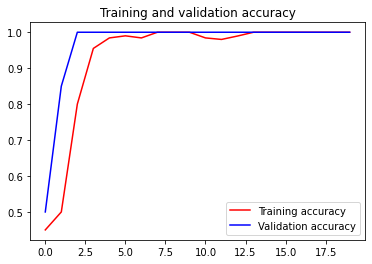

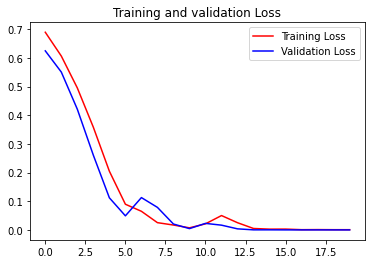

<Figure size 432x288 with 0 Axes>

In [5]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [6]:
scorev = model.evaluate_generator(valid_generator, 2)
scoret = model.evaluate_generator(train_generator, 2)
print("Training Loss: ", scoret[0], "Training Accuracy: ", scoret[1]*100, "%")
print("Validation Loss: ", scorev[0], "Validation Accuracy: ", scorev[1]*100, "%")

Instructions for updating:
Please use Model.evaluate, which supports generators.
Training Loss:  0.00015068589709699154 Training Accuracy:  100.0 %
Validation Loss:  8.423817052971572e-05 Validation Accuracy:  100.0 %


In [7]:
prediction= model.predict(test_generator, verbose=1, steps=5)

5/5 [==============================] - 1s 204ms/step


In [8]:
x=[0]
for i in prediction:
    if (i<0.5):
        #print('Yes')
        x.append(0)
    else:
        #print('No')
        x.append(1)
x.pop(0)

0

In [9]:
import numpy as np
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
confusion_matrix(test_generator.classes, x)

array([[42,  0],
       [ 0, 42]], dtype=int64)

In [10]:
import numpy as np
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

In [11]:
import numpy as np
cm = confusion_matrix(y_true=test_generator.classes, y_pred=x)

Confusion matrix, without normalization
[[42  0]
 [ 0 42]]


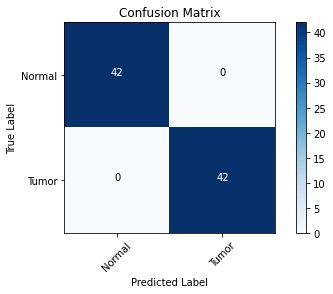

In [12]:
cm_plot_labels = ['Normal', 'Tumor']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [13]:
y_pred = model.predict(test_generator).ravel()

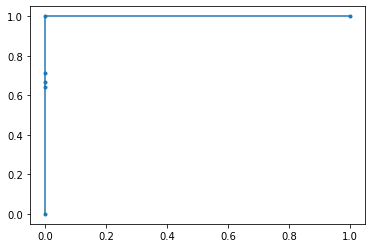

In [14]:
import plotly.io as pio
pio.renderers.default = 'iframe_connected'
from sklearn.metrics import roc_curve, auc
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(test_generator.classes, y_pred)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)

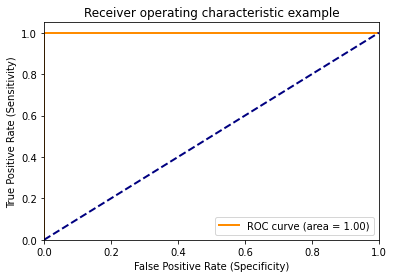

In [15]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(test_generator.classes, x)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [16]:
r_probs = [0 for _ in range(len(test_generator.classes))]
rf_probs = model.predict_proba(test_generator)

Instructions for updating:
Please use `model.predict()` instead.


In [17]:
from sklearn.metrics import roc_curve, roc_auc_score
r_auc = roc_auc_score(test_generator.classes, r_probs)
rf_auc = roc_auc_score(test_generator.classes, rf_probs)
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))

Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 1.000


In [18]:
r_fpr, r_tpr, _ = roc_curve(test_generator.classes, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(test_generator.classes, rf_probs)

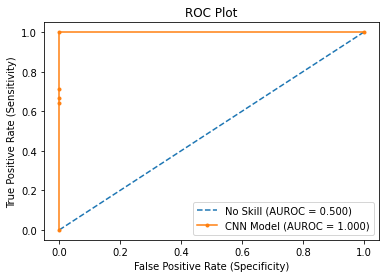

In [19]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='No Skill (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='CNN Model (AUROC = %0.3f)' % rf_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate (Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
# Show legend
plt.legend() # 
# Show plot
plt.show()

In [20]:
model.save('BCDraft01C.h5')